#라이브러리 불러오기

In [2]:
import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

#버전확인
print(matplotlib.__version__)
print(sns.__version__)

3.2.2
0.11.2


## 객체지향으로 시각화 그래프 그리기
- Matplotlib + Seaborn

In [7]:
#데이터 불러오기
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


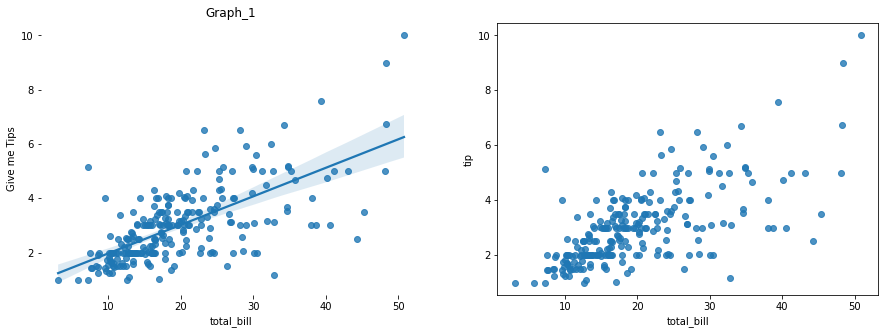

In [48]:
# 객체 선언
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax[0])
sns.regplot(x = 'total_bill', y = 'tip', data = tips, ax = ax[1], fit_reg = False)

# 객체지향을 사용하는 이유
ax[0].set_title('Graph_1') # -> 그래프 개별적으로 컨트롤이 가능하다.
ax[0].set_ylabel('Give me Tips')

ax[0].spines['top'].set_visible(False)
ax[0].spines['left'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
plt.show()

plotly
- matplotlib, seaborn과 유사한 클래스
- Low-Level API, High-Level API

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
import seaborn as sns
import numpy as np

In [44]:
def plot_example(ax, zorder=0):
    ax.bar(tips_day["day"], tips_day["tip"], color="lightgray", zorder=zorder)
    ax.set_title("tip (mean)", fontsize=16, pad=12)

    # Values
    h_pad = 0.1
    for i in range(4):
        fontweight = "normal"
        color = "k"
        if i == 3:
            fontweight = "bold"
            color = "darkred"

        ax.text(i, tips_day["tip"].loc[i] + h_pad, f"{tips_day['tip'].loc[i]:0.2f}", 
                horizontalalignment='center', fontsize=12, fontweight=fontweight, color=color)

    # Sunday
    ax.patches[3].set_facecolor("darkred")
    ax.patches[3].set_edgecolor("black")

    # set_range
    ax.set_ylim(0, 4)
    return ax

def major_formatter(x, pos):
    return "%.2f" % x
formatter = FuncFormatter(major_formatter)

In [18]:
tips_day = tips.groupby("day").mean().reset_index()
tips_day

,day,total_bill,tip,size
0,Thur,17.682742,2.771452,2.451613
1,Fri,17.151579,2.734737,2.105263
2,Sat,20.441379,2.993103,2.517241
3,Sun,21.410000,3.255132,2.842105


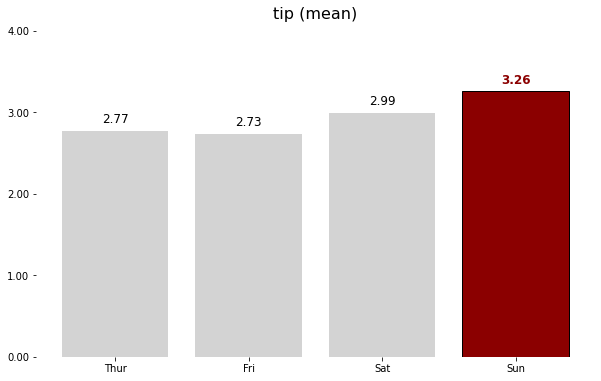

In [46]:
fig, ax = plt.subplots(figsize=(10,6))
ax = plot_example(ax, zorder = 2)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# y축 교체
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.set_minor_locator(MultipleLocator(1))


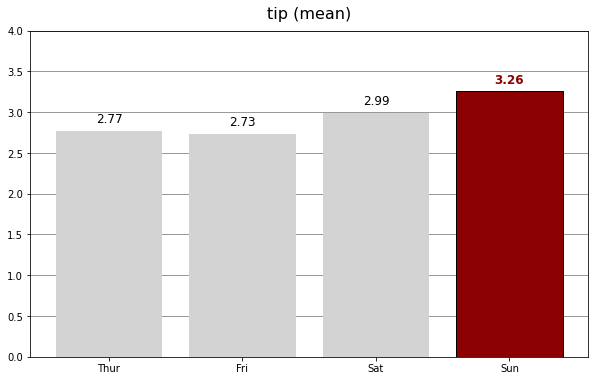

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
ax = plot_example(ax, zorder = 2)

# gird
ax.grid(axis="y", which="major", color="gray")
ax.grid(axis="y", which="minor", ls=":")